In [1]:
%matplotlib inline
import networkx as nx
import itertools
import warnings
warnings.simplefilter("ignore")

## グラフの彩色と染色数

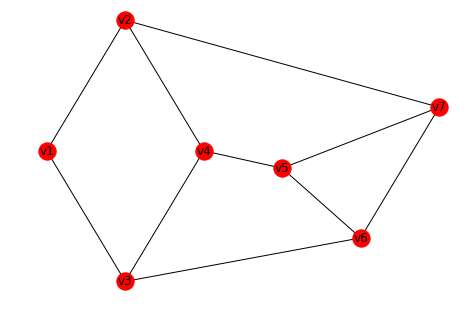

In [2]:
# グラフの構成
G1 = nx.Graph()
G1.add_nodes_from(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7'])
G1.add_edges_from([('v1', 'v2'), ('v1', 'v3'), ('v2', 'v4'), ('v2', 'v7'),
                   ('v3', 'v4'), ('v3', 'v6'), ('v4', 'v5'), ('v5', 'v6'),
                   ('v5', 'v7'), ('v6', 'v7')])
mypos1 = {'v1': (0, 15),
          'v2': (10, 30),
          'v3': (10, 0),
          'v4': (20, 15),
          'v5': (30, 13),
          'v6': (40, 5),
          'v7': (50, 20)}
nx.draw(G1, pos=mypos1, with_labels = True)

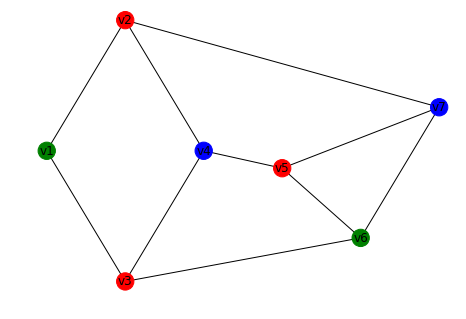

In [3]:
# グラフの頂点に色を付ける
color1_1 = {'v1': 'g', 'v2': 'r', 'v3': 'r', 'v4': 'b', 'v5': 'r', 'v6': 'g', 'v7': 'b'}
color1_1_list = list(map(lambda v: color1_1[v], G1.nodes()))
nx.draw(G1, pos = mypos1, node_color = color1_1_list, with_labels =True)

In [4]:
# color が G の彩色であるか，判定する
def is_proper_coloring(G, color):
    for e in G.edges():
        if color[e[0]] == color[e[1]]:
            return False
    return True

In [5]:
is_proper_coloring(G1, color1_1)

True

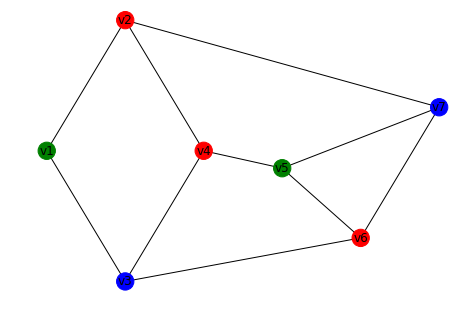

In [6]:
# 彩色ではない例
color1_2 = {'v1': 'g', 'v2': 'r', 'v3': 'b', 'v4': 'r', 'v5': 'g', 'v6': 'r', 'v7': 'b'}
color1_2_list = list(map(lambda v: color1_2[v], G1.nodes()))
nx.draw(G1, pos = mypos1, node_color = color1_2_list, with_labels = True)

In [7]:
is_proper_coloring(G1, color1_2)

False

In [8]:
# 染色数の計算 (遅いので注意)
def chromatic_number(G): # warning: this is really slow. I didn't try to make it faster.
    chtmp = G.number_of_nodes()
    for p in itertools.permutations(G.nodes()):
        my_order = list(p)
        d = nx.coloring.greedy_color(G, lambda G, colors: my_order)
        if chtmp > len(set(d.values())):
            chtmp = len(set(d.values()))
    return chtmp

In [9]:
chromatic_number(G1)

3

In [10]:
# k彩色可能性の判定 (遅いので注意)
def is_k_colorable(G, k): # warning: this is really slow. I didn't try to make it faster.
    return chromatic_number(G) <= k

In [11]:
is_k_colorable(G1, 3)

True

In [12]:
is_k_colorable(G1, 2)

False

In [13]:
# X が G の独立集合であるか判定
def is_independent(G, X):
    for p in itertools.combinations(X, 2):
        if G.has_edge(*p):
            return False
    return True

In [14]:
is_independent(G1, ['v1', 'v4', 'v6'])

True

In [15]:
is_independent(G1, ['v1', 'v4', 'v5'])

False

## 辺彩色

In [16]:
# color が G の辺彩色であるか判定
def is_proper_edge_coloring(G, color):
    return is_proper_coloring(nx.line_graph(G), color)

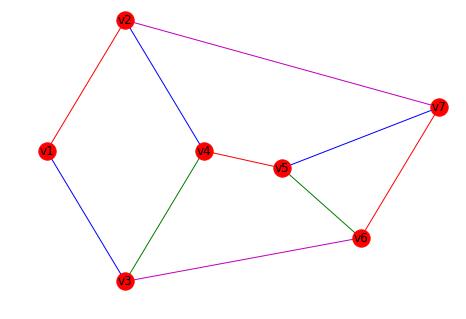

In [17]:
# グラフの辺に色を付ける
edge_color1_1 = {('v1', 'v2'): 'r', ('v2', 'v1'): 'r', 
                 ('v1', 'v3'): 'b', ('v3', 'v1'): 'b', 
                 ('v2', 'v4'): 'b', ('v4', 'v2'): 'b', 
                 ('v2', 'v7'): 'm', ('v7', 'v2'): 'm', 
                 ('v3', 'v4'): 'g', ('v4', 'v3'): 'g',
                 ('v3', 'v6'): 'm', ('v6', 'v3'): 'm',
                 ('v4', 'v5'): 'r', ('v5', 'v4'): 'r',
                 ('v5', 'v6'): 'g', ('v6', 'v5'): 'g',
                 ('v5', 'v7'): 'b', ('v7', 'v5'): 'b', 
                 ('v6', 'v7'): 'r', ('v7', 'v6'): 'r' } # edge colors need to be specified for both tuples (u,v) and (v, u).
edge_color1_1_list = list(map(lambda e: edge_color1_1[e], G1.edges()))
nx.draw(G1, pos = mypos1, edge_color = edge_color1_1_list, with_labels =True)

In [18]:
is_proper_edge_coloring(G1, edge_color1_1)

True

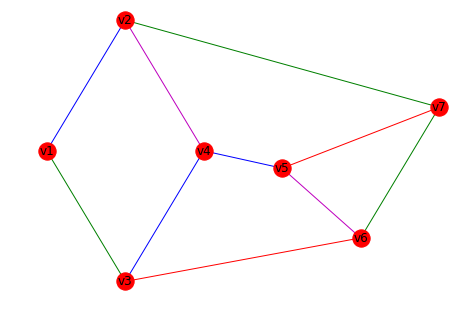

In [19]:
# 辺彩色ではない例
edge_color1_2 = {('v1', 'v2'): 'b', ('v2', 'v1'): 'b', 
                 ('v1', 'v3'): 'g', ('v3', 'v1'): 'g', 
                 ('v2', 'v4'): 'm', ('v4', 'v2'): 'm', 
                 ('v2', 'v7'): 'g', ('v7', 'v2'): 'g', 
                 ('v3', 'v4'): 'b', ('v4', 'v3'): 'b',
                 ('v3', 'v6'): 'r', ('v6', 'v3'): 'r',
                 ('v4', 'v5'): 'b', ('v5', 'v4'): 'b',
                 ('v5', 'v6'): 'm', ('v6', 'v5'): 'm',
                 ('v5', 'v7'): 'r', ('v7', 'v5'): 'r', 
                 ('v6', 'v7'): 'g', ('v7', 'v6'): 'g' } # edge colors need to be specified for both tuples (u,v) and (v, u).
edge_color1_2_list = list(map(lambda e: edge_color1_2[e], G1.edges()))
nx.draw(G1, pos = mypos1, edge_color = edge_color1_2_list, with_labels =True)

In [20]:
is_proper_edge_coloring(G1, edge_color1_2)

False

In [21]:
# 辺染色数の計算 (遅いので注意)
def edge_chromatic_number(G):
    return chromatic_number(nx.line_graph(G))

In [22]:
edge_chromatic_number(G1) #warning: this is really really slow.

4

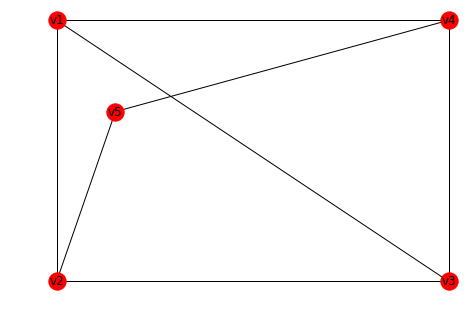

In [23]:
# 別のグラフの例
G2 = nx.Graph()
G2.add_nodes_from(['v1', 'v2', 'v3', 'v4', 'v5'])
G2.add_edges_from([('v1', 'v2'), ('v1', 'v3'), ('v1', 'v4'), 
                   ('v2', 'v3'), ('v2', 'v5'), ('v3', 'v4'), ('v4', 'v5')])
mypos2 = {'v1': (0, 20),
          'v2': (0, 0),
          'v3': (20, 0),
          'v4': (20, 20),
          'v5': (3, 13)}
nx.draw(G2, pos=mypos2, with_labels = True)

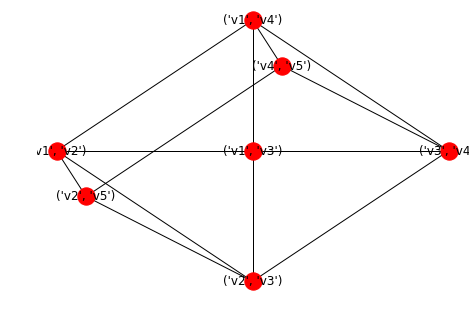

In [24]:
# G3 は G2 の線グラフ
G3 = nx.line_graph(G2)
mypos3 = dict(map(lambda e: (e, ((mypos2[e[0]][0]+mypos2[e[1]][0])/2, (mypos2[e[0]][1]+mypos2[e[1]][1])/2)), G3.nodes()))
nx.draw(G3, pos=mypos3, with_labels = True)

## 貪欲彩色

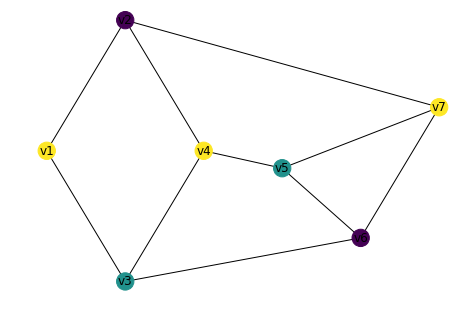

In [25]:
color1_greedy1 = nx.coloring.greedy_color(G1, lambda G, colors: ['v2', 'v6', 'v5', 'v4', 'v3', 'v1', 'v7'])
color1_greedy1_list = list(map(lambda v: color1_greedy1[v], G1.nodes()))
nx.draw(G1, pos = mypos1, node_color = color1_greedy1_list, with_labels = True)

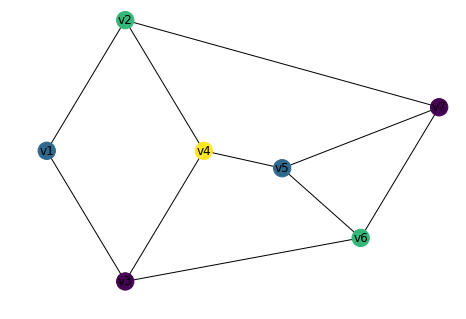

In [26]:
color1_greedy2 = nx.coloring.greedy_color(G1, lambda G, colors: ['v7', 'v5', 'v6', 'v3', 'v1', 'v2', 'v4'])
color1_greedy2_list = list(map(lambda v: color1_greedy2[v], G1.nodes()))
nx.draw(G1, pos = mypos1, node_color = color1_greedy2_list, with_labels = True)

## 染色数とクリーク数の弱双対性

In [27]:
# C が G のクリークであるか判定
def is_clique(G, C):
    for p in itertools.combinations(C, 2):
        if not G.has_edge(*p):
            return False
    return True    

In [28]:
is_clique(G1, ['v5', 'v6', 'v7'])

True

In [29]:
is_clique(G1, ['v4', 'v5', 'v6'])

False

In [30]:
# クリーク数の計算
nx.graph_clique_number(G1) # Again, this can be slow.

3

In [31]:
# 頂点数5の閉路のクリーク数
nx.graph_clique_number(nx.cycle_graph(5))

2

In [32]:
# 頂点数5の閉路の染色数
chromatic_number(nx.cycle_graph(5))

3